## Observations and Insights 

# Observations

# The analysis is done on 248 mouses where 49% are Female and 51% are Male mouses.

# According to the Summary Statistics table, Capomulin and Ramicane shows the most promising results as the tumour volume is the lowest and mean and median values are almost same. Moreover, the Variances are also lowest among the other treatments which implies, the tumour volumes are less spread out.
# The correlation between mouse weight and the average tumour volume is 0.84, that means the mouse weight and the average tumour volume has a strong positive correlation.

In [285]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata,study_results, how="left", on=["Mouse ID"])
# Display the data table for preview
combined_data.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [286]:
# Checking the number of mice.
total_mice=combined_data["Mouse ID"].nunique()
total_mice

249

In [287]:
combined_data.shape

(1893, 8)

In [288]:
combined_data['Timepoint'].shape

(1893,)

In [289]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data_2 = combined_data[combined_data[['Mouse ID','Timepoint']].duplicated()==True]
print(combined_data_2)
    

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumour Volume (mm3)  Metastatic Sites  
909            45.000000                 0  
911            47.570392                 0  
913            49.880528                 0  
915            53.442020                 0  
917            54.657650                 1  


In [290]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_ID = combined_data[combined_data.duplicated(["Mouse ID","Timepoint"])]
duplicate_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [291]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

final_data = combined_data[combined_data['Mouse ID']!="g989"]
final_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [292]:
# Checking the number of mice in the clean DataFrame.
len(final_data["Mouse ID"].unique())

248

## Summary Statistics

In [293]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.
mean_result=final_data.groupby(["Drug Regimen"]).mean()["Tumour Volume (mm3)"]
median_result=final_data.groupby(["Drug Regimen"]).median()["Tumour Volume (mm3)"]
variance_result=final_data.groupby(["Drug Regimen"]).var()["Tumour Volume (mm3)"]
std_results=final_data.groupby(["Drug Regimen"]).std()["Tumour Volume (mm3)"]
sem_result=final_data.groupby(["Drug Regimen"]).sem()["Tumour Volume (mm3)"]

summary_statistics = pd.DataFrame({"Mean":mean_result, "Median":median_result, "Variance":variance_result,"Standard Deviation":std_results, "SEM":sem_result})
summary_statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [294]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_agg = final_data.groupby('Drug Regimen')['Tumour Volume (mm3)'].aggregate({'median','var','mean','std','sem'})  

#Changing Header

header_name={'mean':'Mean','median':'Median','var':'Variance','std':'Standard Deviation','sem':'SEM'} 
summary_statistics_agg.rename(columns=header_name,inplace=True)
display(summary_statistics_agg)

,Variance,SEM,Mean,Median,Standard Deviation
Drug Regimen,,,,,
Capomulin,24.947764,0.329346,40.675741,41.557809,4.994774
Ceftamin,39.290177,0.469821,52.591172,51.776157,6.268188
Infubinol,43.128684,0.492236,52.884795,51.820584,6.567243
Ketapril,68.553577,0.603860,55.235638,53.698743,8.279709
Naftisol,66.173479,0.596466,54.331565,52.509285,8.134708
Placebo,61.168083,0.581331,54.033581,52.288934,7.821003
Propriva,43.852013,0.544332,52.320930,50.446266,6.622085
Ramicane,23.486704,0.320955,40.216745,40.673236,4.846308
Stelasyn,59.450562,0.573111,54.233149,52.431737,7.710419


## Bar and Pie Charts

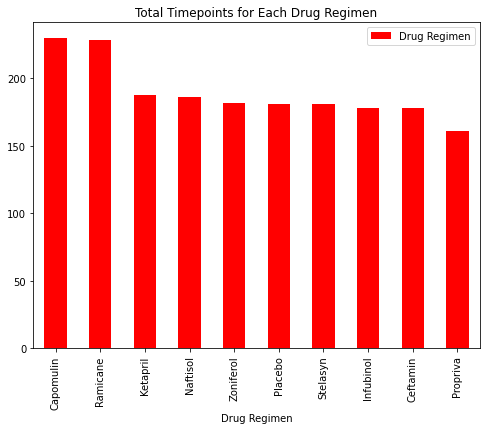

In [295]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas

#total timepoints bar chart using Pandas

timepoint_data=combined_data["Drug Regimen"].value_counts()
figure1=timepoint_data.plot(kind="bar", facecolor="red", figsize=(8,6), title="Total Timepoints for Each Drug Regimen")

figure1.set_xlabel("Drug Regimen")
figure1.set_ylabel=("Total Timepoints")
xticklabels=timepoint_data.index
plt.legend()
plt.show()



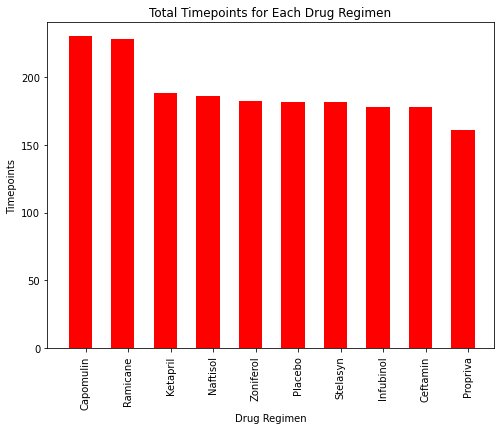

In [296]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#total timepoints bar chart using pyplot

timepoint_df=pd.DataFrame(timepoint_data)
x_axis=np.arange(len(timepoint_df))
tick_locations=[value+0.4 for value in x_axis]
plt.figure(figsize=(8,6))
plt.bar(x_axis,timepoint_df["Drug Regimen"], color='r',alpha=1,width=0.55, align="edge")
plt.xticks(tick_locations,timepoint_data.index,rotation="vertical")
plt.xlim(-0.50, len(x_axis))
plt.ylim(0, max(timepoint_data)+10)
plt.title("Total Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")

plt.show()





Text(0.5, 1.0, 'Distribution of Male versus Female mice')

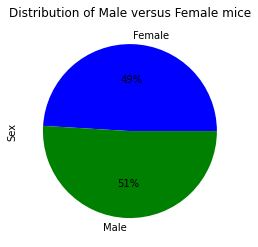

In [297]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df=final_data.groupby("Sex")
gender=gender_df["Sex"].count()
values=["Sex"]
colors=['b','g']
gender.plot(kind='pie',y='Sex',autopct='%1.0f%%', colors=colors)
plt.title("Distribution of Male versus Female mice")



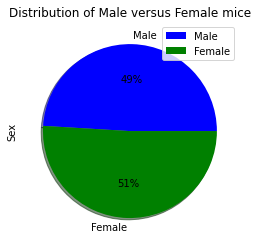

In [298]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
count=[gender["Female"],gender["Male"]]
colors=['b','g']
labels=['Male','Female']

plt.pie(count, colors=colors, labels=labels,counterclock=True,autopct='%1.0f%%', shadow=True)
plt.title("Distribution of Male versus Female mice")
plt.ylabel("Sex")
plt.legend()
plt.show()


## Quartiles, Outliers and Boxplots

In [299]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint=final_data.groupby("Mouse ID")
last_timepoint=last_timepoint["Timepoint"].max()
last_timepoint_df=pd.DataFrame(last_timepoint)
tumour_vol_df=pd.merge(last_timepoint,final_data, on=["Mouse ID","Timepoint"])
tumour_vol_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumour Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [300]:
# Put treatments into a list for for loop (and later for plot labels)

treatments=["Capomulin","Ramicane","Infubinol","Ceftamin"]
# Create empty list to fill with tumour vol data (for plotting)
tumour_vol_Cap=[]
tumour_vol_Ram=[]
tumour_vol_Infu=[]
tumour_vol_Cef=[]

for i in range (len(tumour_vol_df)-1):
    if tumour_vol_df.loc[i,"Drug Regimen"]=="Capomulin":
        tumour_vol_Cap.append(tumour_vol_df.loc[i,"Tumour Volume (mm3)"])
    if tumour_vol_df.loc[i,"Drug Regimen"]=="Ramicane":
        tumour_vol_Ram.append(tumour_vol_df.loc[i,"Tumour Volume (mm3)"])
    if tumour_vol_df.loc[i,"Drug Regimen"]=="Infubinol":
        tumour_vol_Infu.append(tumour_vol_df.loc[i,"Tumour Volume (mm3)"])
    if tumour_vol_df.loc[i,"Drug Regimen"]=="Ceftamin":
        tumour_vol_Cef.append(tumour_vol_df.loc[i,"Tumour Volume (mm3)"])
        
tumour_vol=[tumour_vol_Cap,tumour_vol_Ram,tumour_vol_Infu,tumour_vol_Cef]            
          
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Outlier_list=[]
for i in range(len(tumour_vol)):
    quartiles=pd.Series(tumour_vol[i]).quantile([.25,.5,.75])
    lowerq=quartiles[0.25]
    upperq=quartiles[0.75]
    iqr=upperq-lowerq
    print(f"\n{treatments[i]}:")
    print(f"The lower quartile of tumour volume is:{lowerq}.")
    print(f"The upper quartile of tumour volume is {upperq}.")
    print(f"The Interquartile Range of tumour volume is:{iqr}.")
    print(f"The median of tumour volume is: {quartiles[0.5]}.")
    lower_bound=lowerq-(1.5*iqr)
    upper_bound=upperq+(1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
          
 # Locate the rows which contain mice on each drug and get the tumour volumes

# add subset 
    
# Determine outliers using upper and lower bounds
for j in range(len(tumour_vol[i])):
        if (tumour_vol[i][j]<lower_bound) or (tumour_vol[i][j]>upper_bound):
            outlier=tumour_vol[i][j]
            outlier_list.append(outlier)
            print(f"The outliers are{outlier_list}.")


Capomulin:
The lower quartile of tumour volume is:32.37735684.
The upper quartile of tumour volume is 40.1592203.
The Interquartile Range of tumour volume is:7.781863460000004.
The median of tumour volume is: 38.1251644.
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Ramicane:
The lower quartile of tumour volume is:31.56046955.
The upper quartile of tumour volume is 40.65900627.
The Interquartile Range of tumour volume is:9.098536719999998.
The median of tumour volume is: 36.56165229.
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Infubinol:
The lower quartile of tumour volume is:54.04860769.
The upper quartile of tumour volume is 65.52574285.
The Interquartile Range of tumour volume is:11.477135160000003.
The median of tumour volume is: 60.16518046.
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.

Ceftamin:
The lower quartile of tumour v

<function matplotlib.pyplot.show(close=None, block=None)>

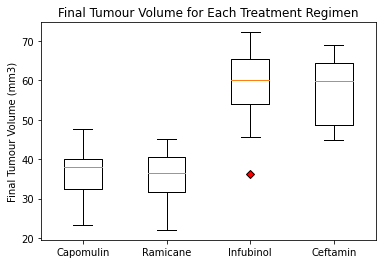

In [301]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
Outliers=dict(markerfacecolor = 'r', marker = "D")
fig1,axl = plt.subplots()
axl.set_ylabel("Final Tumour Volume (mm3)")
axl.boxplot(tumour_vol, flierprops = Outliers)
axl.set_title("Final Tumour Volume for Each Treatment Regimen", fontsize = 12)
axl.set_xticklabels(treatments)
plt.show

## Line and Scatter Plots

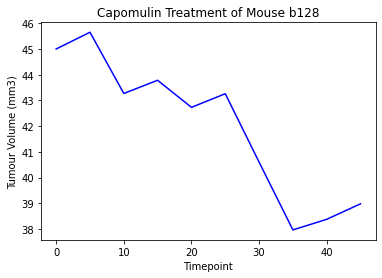

In [302]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
#tumour volume for all mouse with Capomulin treatment
tumour_vol_df.loc[tumour_vol_df["Drug Regimen"]=="Capomulin"].head()

#select one mouse
b128_tumour=final_data.loc[final_data["Mouse ID"]=="b128"]

#lineplot
plt.plot(b128_tumour["Timepoint"],b128_tumour["Tumour Volume (mm3)"], color = "blue")
plt.title("Capomulin Treatment of Mouse b128")
plt.xlabel("Timepoint")
plt.ylabel("Tumour Volume (mm3)")
plt.show()


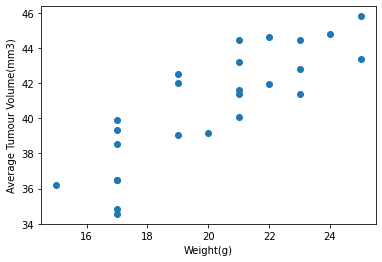

In [303]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
Capomulin_df=final_data.loc[final_data["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")
average_tumour_cap=Capomulin_df["Tumour Volume (mm3)"].mean()
mouse_weight=Capomulin_df["Weight (g)"].unique()
plt.scatter(mouse_weight,average_tumour_cap)
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumour Volume(mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumour volume is 0.84


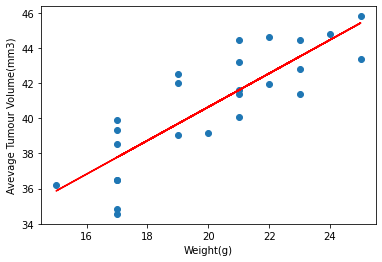

In [304]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
mouse_weight=mouse_weight.astype(float)
correlation=st.pearsonr(mouse_weight,average_tumour_cap)
(slope, intercept, rvalue, pvalue, stderr)=st.linregress(mouse_weight,average_tumour_cap)
regress_values=mouse_weight*slope+intercept
line_eq="y=" +str(round(slope,2)) +"x +" +str(round(intercept,2))
plt.scatter(mouse_weight,average_tumour_cap)
plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Weight(g)")
plt.ylabel("Avevage Tumour Volume(mm3)")
print(f"The correlation between mouse weight and the average tumour volume is {round(correlation[0],2)}")
plt.show()      